In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image

import sklearn.model_selection as ms

import pydotplus
import sklearn.datasets as sd
import sklearn.metrics as mt
import pandas as pd

In [39]:
x = sd.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

In [40]:
cancer.info()
cancer.describe()
cancer.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

In [41]:
X = cancer.iloc[:, :-1]
Y = cancer.iloc[:, -1]

X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt_model.predict(X_test)

In [44]:
accuracy = mt.accuracy_score(Y_test, y_pred)
recall = mt.recall_score(Y_test, y_pred)
precision = mt.precision_score(Y_test, y_pred)
f1_score = mt.f1_score(Y_test, y_pred)
matrix = mt.confusion_matrix(Y_test, y_pred)

print('Train_Accuracy: ', dt_model.score(X_train, Y_train), '\n')
print('Accuracy: ', format(accuracy, '.2f'), '\n')
print('Recall: ', format(recall, '.2f'), '\n')
print('Precision: ', format(precision, '.2f'), '\n')
print('F1_score: ', format(f1_score, '.2f'), '\n')
print('Confusion Matrix: ', '\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.95 

Recall:  0.98 

Precision:  0.94 

F1_score:  0.96 

Confusion Matrix:  
 [[ 63   6]
 [  2 100]]


In [45]:
scores = cross_val_score(dt_model, X, Y, cv = 5)
scores

array([0.9122807 , 0.93859649, 0.9122807 , 0.93859649, 0.89380531])

In [46]:
pd.DataFrame(cross_validate(dt_model, X, Y, cv = 5))
print(scores.mean())

0.9191119391398852


In [47]:
dt_model = DecisionTreeClassifier(random_state = 33)

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15, 2)],
              'min_samples_leaf': [x for x in range(1, 15, 2)],
              'max_features': ['sqrt', 'log2', None],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

grid_search = GridSearchCV(dt_model, param_grid = parameters, cv = 5)
grid_search.fit(X_train, Y_train)

result = pd.DataFrame(grid_search.cv_results_['params'])
result['mean_test_score'] = grid_search.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,mean_test_score
2802,None,gini,9,sqrt,5,9,best,0.952184
2544,None,gini,7,sqrt,5,3,best,0.952184
2548,None,gini,7,sqrt,5,7,best,0.952184
2550,None,gini,7,sqrt,5,9,best,0.952184
2546,None,gini,7,sqrt,5,5,best,0.952184
...,...,...,...,...,...,...,...,...
3187,None,entropy,3,log2,13,9,random,0.839082
3189,None,entropy,3,log2,13,11,random,0.839082
3191,None,entropy,3,log2,13,13,random,0.839082
155,balanced,gini,3,log2,11,13,random,0.839082


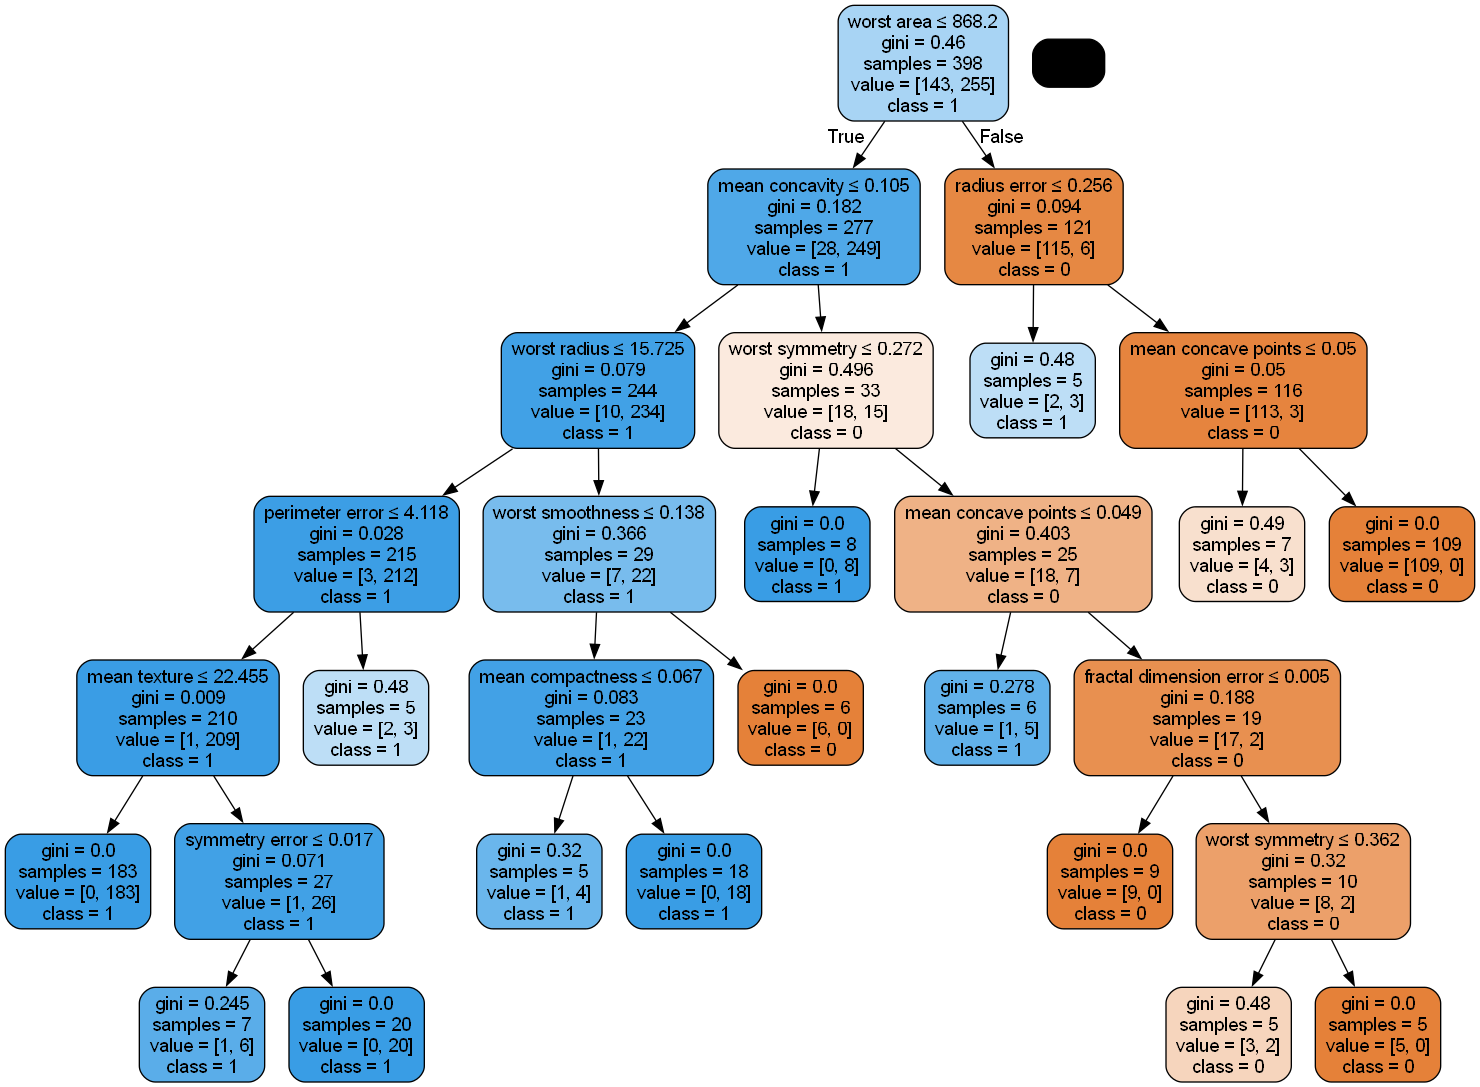

In [48]:
x_list = list(X.columns)
y_list = list(Y.drop_duplicates(inplace=False))

class_names = [str(label) for label in y_list]

dot_data = export_graphviz(grid_search.best_estimator_, out_file=None, feature_names=x_list, class_names=class_names, filled=True, rounded=True, special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())